<a href="https://colab.research.google.com/github/gomlfx/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_113_Join_and_Reshape_Data_Assignment_Mike_Smith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-09 20:59:26--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.177.197
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.177.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.2MB/s    in 13s     

2019-11-09 20:59:41 (14.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk
First, write down which columns you need and which dataframes have them.
Next, merge these into a single dataframe.
Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [5]:
##### YOUR CODE HERE #####
#explore each csv  by sampling item name
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("aisles.csv")
print(df.shape)
print(df)



(134, 2)
     aisle_id                          aisle
0           1          prepared soups salads
1           2              specialty cheeses
2           3            energy granola bars
3           4                  instant foods
4           5     marinades meat preparation
5           6                          other
6           7                  packaged meat
7           8                bakery desserts
8           9                    pasta sauce
9          10               kitchen supplies
10         11               cold flu allergy
11         12                    fresh pasta
12         13                 prepared meals
13         14         tofu meat alternatives
14         15               packaged seafood
15         16                    fresh herbs
16         17             baking ingredients
17         18   bulk dried fruits vegetables
18         19                  oils vinegars
19         20                   oral hygiene
20         21                packaged cheese
2

In [6]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("departments.csv")
print(df.shape)
print(df)

(21, 2)
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [7]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("order_products__prior.csv")
print(df.shape)
print(df)

(32434489, 4)
          order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
...            ...         ...                ...        ...
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1

[32434489 rows x 4 columns]


In [8]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("order_products__train.csv")
print(df.shape)
print(df)

(1384617, 4)
         order_id  product_id  add_to_cart_order  reordered
0               1       49302                  1          1
1               1       11109                  2          1
2               1       10246                  3          0
3               1       49683                  4          0
4               1       43633                  5          1
...           ...         ...                ...        ...
1384612   3421063       14233                  3          1
1384613   3421063       35548                  4          1
1384614   3421070       35951                  1          1
1384615   3421070       16953                  2          1
1384616   3421070        4724                  3          1

[1384617 rows x 4 columns]


In [9]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("orders.csv")
print(df.shape)
print(df)

(3421083, 7)
         order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     NaN  
1                        7                    15.0  
2                       12                    21.0  
3     

In [10]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("products.csv")
print(df.shape)
print(df)


(49688, 4)
       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94          

In [11]:
#departments(21 rows), aisles(134 rows), products (49688 rows) files have string data like banana, etc. 
#logically, you can see less depts vs aisles vs products, etc. So our strings are in products csv. There are 49000 product id's, which is our items?
#search products.csv file for our string matches:
#Bag of Organic Bananas
#Organic Strawberries
#Organic Baby Spinach
#Organic Hass Avocado
#Organic Avocado
#Large Lemon
#Strawberries
#Limes
#Organic Whole Milk
import numpy as np
df=pd.read_csv('products.csv')
print(np.where((df['product_name']=='Banana')))
print(np.where((df['product_name']=='Bag of Organic Bananas')))
print(np.where((df['product_name']=='Organic Strawberries')))
print(np.where((df['product_name']=='Organic Baby Spinach')))
print(np.where((df['product_name']=='Organic Hass Avocado')))
print(np.where((df['product_name']=='Organic Avocado')))
print(np.where((df['product_name']=='Large Lemon')))
print(np.where((df['product_name']=='Strawberries')))
print(np.where((df['product_name']=='Limes')))
print(np.where((df['product_name']=='Organic Whole Milk')))

(array([24851]),)
(array([13175]),)
(array([21136]),)
(array([21902]),)
(array([47208]),)
(array([47765]),)
(array([47625]),)
(array([16796]),)
(array([26208]),)
(array([27844]),)


In [0]:
#24851 13175 21136 21902 47208 47765 47625 16796 26208 27844

In [13]:
#Index of items found, print row to confirm our item
print(df.iloc[[24851]])
print(df.iloc[[13175]])
print(df.iloc[[21136]])
print(df.iloc[[21902]])
print(df.iloc[[47208]])
print(df.iloc[[47765]])
print(df.iloc[[47625]])
print(df.iloc[[16796]])
print(df.iloc[[26208]])
print(df.iloc[[27844]])

       product_id product_name  aisle_id  department_id
24851       24852       Banana        24              4
       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
       product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4
       product_id          product_name  aisle_id  department_id
21902       21903  Organic Baby Spinach       123              4
       product_id          product_name  aisle_id  department_id
47208       47209  Organic Hass Avocado        24              4
       product_id     product_name  aisle_id  department_id
47765       47766  Organic Avocado        24              4
       product_id product_name  aisle_id  department_id
47625       47626  Large Lemon        24              4
       product_id  product_name  aisle_id  department_id
16796       16797  Strawberries        24              4
       product_id 

In [14]:
#now I have the product_id, I can merge both files and collect to find frequency.
#using product_id as key variable.
source1= pd.read_csv("order_products__prior.csv")
source2=pd.read_csv("order_products__train.csv")
#filter for only columns I need
source1 = source1[['product_id']]
source2 = source2[['product_id']]

##24851 13175 21136 21902 47208 47765 47625 16796 26208 27844
#use or, not and!
condition_source1 = (source1['product_id'] == 24851) | (source1['product_id']==13175) | (source1['product_id']==21136) | (source1['product_id']==21902) | (source1['product_id']==47208) | (source1['product_id']==47765) | (source1['product_id']==47625) | (source1['product_id']==16796) | (source1['product_id']==26208) | (source1['product_id']==27844)
condition_source2 = (source2['product_id'] == 24851) | (source2['product_id']==13175) | (source2['product_id']==21136) | (source2['product_id']==21902) | (source2['product_id']==47208) | (source2['product_id']==47765) | (source2['product_id']==47625) | (source2['product_id']==16796) | (source2['product_id']==26208) | (source2['product_id']==27844)

#filter, lecture notes are easier to read than video
print(source1[condition_source1].shape)
print(source1[condition_source1].sample(11))
print(source2[condition_source2].shape)
print(source2[condition_source2].sample(11))


(548, 1)
          product_id
14300321       13175
1123639        13175
6473901        26208
29128284       26208
9340026        47765
14339393       47765
7630831        47208
18828578       47765
29681405       21902
19501462       13175
10607297       13175
(18, 1)
         product_id
967763        47765
163181        16796
1355835       47625
1151978       26208
1212346       26208
3830          13175
239543        13175
689730        26208
446576        16796
1202522       16796
864809        47625


In [15]:
#turn the filtered into it's own df
source1_subset = source1[condition_source1]
source2_subset = source2[condition_source2]
print(source1_subset.shape)
print(source2_subset.shape)
print(source1_subset.head(11))
print(source2_subset.head(11))

(548, 1)
(18, 1)
        product_id
85796        47765
150628       21136
249939       47208
298927       27844
313832       13175
388412       27844
451350       26208
528118       47765
528275       13175
608503       47765
611787       21902
         product_id
3830          13175
26353         47765
163181        16796
239543        13175
446576        16796
632178        47625
689730        26208
864809        47625
967763        47765
970481        47765
1015105       13175


In [16]:
#merge
pd.set_option('display.max_rows', None)
merged = pd.merge(source1_subset, source2_subset, how= 'left', on='product_id')
print(merged.head(10))
print(merged.shape)
#find the frequency
merged.product_id.value_counts().nlargest(11)
#merged.product_id.value_counts()

   product_id
0       47765
1       47765
2       47765
3       21136
4       47208
5       27844
6       13175
7       13175
8       13175
9       13175
(1745, 1)


13175    656
26208    400
47765    333
16796    164
47625     90
21136     31
21902     30
47208     18
27844     14
24851      9
Name: product_id, dtype: int64

In [0]:
#24851 13175 21136 21902 47208 47765 47625 16796 26208 27844

In [0]:
#1:44:41/2:02:09 filtering 1st before merging or df will crash
#1:44:30
#1:38:20
#why is value_counts() returning only top 5 elements? #solved above: it was because how= parameter.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
#replicate the lesson code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [20]:
#concatenate
#create df1
df1 = pd.DataFrame([['a',1],['b',2]], columns=['letter','number'])
df1.head()

letter  number
0      a       1
1      b       2

In [21]:
#create df2
df2 = pd.DataFrame([['c',3],['d',4]],columns=['letter','number'])
df2.head()

letter  number
0      c       3
1      d       4

In [22]:
#now concat
df3=pd.concat([df1,df2], axis=0)
df3

letter  number
0      a       1
1      b       2
0      c       3
1      d       4

In [23]:
df4=pd.concat([df1,df2], axis=1)
df4.columns=['a','b','c','d']
df4

a  b  c  d
0  a  1  c  3
1  b  2  d  4

In [24]:
#concat is simplest, just sticks two df's together. .merge() is the advanced function
#stocknames
stockname = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname

Symbol       Name
0   AMZN     Amazon
1   MSFT  Microsoft
2     FB   Facebook
3   AAPL      Apple
4  GOOGL     Google

In [25]:
# stock prices.
openprice = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

Symbol  OpenPrice
0   AAPL     217.51
1   MSFT      96.54
2  GOOGL     501.30
3     FB      51.45
4   AMZN    1703.34

In [26]:
#merge the dataframes
named_stocks=pd.merge(openprice, stockname)
named_stocks
#common key = common column? eyve good job at the lecture! 

Symbol  OpenPrice       Name
0   AAPL     217.51      Apple
1   MSFT      96.54  Microsoft
2  GOOGL     501.30     Google
3     FB      51.45   Facebook
4   AMZN    1703.34     Amazon

In [27]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

Symbol  52wkHigh
0     FB     60.79
1   AMZN   2050.49
2   AAPL    233.47
3   MSFT    110.11
4   NFLX    303.22

In [28]:
#now merge the above 2 datasets
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='inner')
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='left')
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='right')
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='outer')
full_stocks
#on=, is the common column, how=, is which side is main to contrast

Symbol  OpenPrice       Name  52wkHigh
0   AAPL     217.51      Apple    233.47
1   MSFT      96.54  Microsoft    110.11
2  GOOGL     501.30     Google       NaN
3     FB      51.45   Facebook     60.79
4   AMZN    1703.34     Amazon   2050.49
5   NFLX        NaN        NaN    303.22

In [29]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

In [30]:
#reshape: melt and pivot table
full_stocks.shape

(6, 4)

In [31]:
#let's create a simple table for Tidy Data
#start with wide data
myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame([[np.nan, 2],[16,11],[3,1]],columns=mycolumns,index=myindex)
table1

treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1

In [32]:
#transpose
table2 = table1.T # .T means transpose! It moves the rows to columns thus the name wide table
table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [33]:
#tidy
#get the columns as a list
list(table1.columns)
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [34]:
#get the index values as a list
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [35]:
#for table1 convert index list into a column using reset_index()
table1 = table1.reset_index()
table1

index  treatmenta  treatmentb
0    John Smith         NaN           2
1      Jane Doe        16.0          11
2  Mary Johnson         3.0           1

In [36]:
#convert the table from wide to tidy using melt()
tidy=table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy

index    variable  value
0    John Smith  treatmenta    NaN
1      Jane Doe  treatmenta   16.0
2  Mary Johnson  treatmenta    3.0
3    John Smith  treatmentb    2.0
4      Jane Doe  treatmentb   11.0
5  Mary Johnson  treatmentb    1.0

In [37]:
#to clean things up, rename columns
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

index    variable  value
0    John Smith  treatmenta    NaN
1      Jane Doe  treatmenta   16.0
2  Mary Johnson  treatmenta    3.0
3    John Smith  treatmentb    2.0
4      Jane Doe  treatmentb   11.0
5  Mary Johnson  treatmentb    1.0

In [38]:
tidy = tidy.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
# shorten the `trt` values
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

name trt  result
0    John Smith   a     NaN
1      Jane Doe   a    16.0
2  Mary Johnson   a     3.0
3    John Smith   b     2.0
4      Jane Doe   b    11.0
5  Mary Johnson   b     1.0

In [39]:
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt              a     b
name                    
Jane Doe      16.0  11.0
John Smith     NaN   2.0
Mary Johnson   3.0   1.0

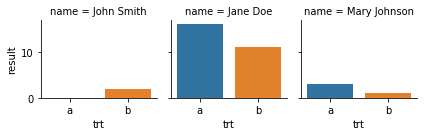

In [40]:
#plot using seaborn
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

In [0]:
#more complex examples
#concatenating time-series from Chicago
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [42]:
#1st quarter
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


trip_id        starttime         stoptime  bikeid  tripduration  \
0  4607895   3/12/2015 7:11   3/12/2015 7:16    2058           322   
1  4467889  1/22/2015 17:07  1/22/2015 17:10    2499           178   
2  4644042  3/16/2015 10:30  3/16/2015 10:36     369           346   
3  4598015  3/10/2015 17:19  3/10/2015 17:36     857          1048   
4  4467863  1/22/2015 17:02  1/22/2015 17:12    2241           611   

   from_station_id             from_station_name  to_station_id  \
0               75       Canal St & Jackson Blvd            284   
1               16           Wood St & North Ave             58   
2               91  Clinton St & Washington Blvd            100   
3              134      Peoria St & Jackson Blvd            128   
4               52        Michigan Ave & Lake St            192   

                       to_station_name    usertype gender  birthyear  
0          Michigan Ave & Jackson Blvd  Subscriber   Male     1960.0  
1         Marshfield Ave & Cortland St  Subscriber   Male     1977.0  
2  Orleans St & Merchandise Mart Plaza  Subscriber   Male     1986.0  
3              Damen Ave & Chicago Ave  Subscriber   Male     1984.0  
4                  Canal St & Adams St  Subscriber   Male     1963.0

In [43]:
#2nd quarter?
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


trip_id        starttime         stoptime  bikeid  tripduration  \
0  5019758   5/2/2015 10:05   5/2/2015 10:14      72           545   
1  4874907  4/15/2015 17:21  4/15/2015 17:26    2683           304   
2  5149598   5/14/2015 6:23   5/14/2015 6:37    3404           806   
3  5127077   5/12/2015 6:33   5/12/2015 6:55    2374          1342   
4  4776193   4/4/2015 19:16   4/4/2015 19:39    2848          1432   

   from_station_id           from_station_name  to_station_id  \
0              223  Clifton Ave & Armitage Ave            349   
1              197   Michigan Ave & Madison St            174   
2              273      Michigan Ave & 16th St            192   
3              305   Western Ave & Division St             24   
4               85       Michigan Ave & Oak St            304   

               to_station_name    usertype  gender  birthyear  
0  Halsted St & Wrightwood Ave  Subscriber    Male     1978.0  
1        Canal St & Madison St  Subscriber    Male     1964.0  
2          Canal St & Adams St  Subscriber    Male     1982.0  
3     Fairbanks Ct & Grand Ave  Subscriber  Female     1989.0  
4      Broadway & Waveland Ave  Subscriber    Male     1978.0

In [44]:
#do they have exactly the same column names? Otherwise .concat() won't work.
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [45]:
#check if they're really equal
def diff_check(list1,list2):
  diff=list(set(list1)-set(list2))
  print('difference is:',diff)

diff_check(q1.columns, q2.columns)
#empty value means there's no difference, the columns are exactly equal

difference is: []


In [46]:
#now that we know they're equal, .concat() them
q1_q2=pd.concat([q1,q2], axis=0)
(q1_q2)

trip_id        starttime         stoptime  bikeid  tripduration  \
0    4607895   3/12/2015 7:11   3/12/2015 7:16    2058           322   
1    4467889  1/22/2015 17:07  1/22/2015 17:10    2499           178   
2    4644042  3/16/2015 10:30  3/16/2015 10:36     369           346   
3    4598015  3/10/2015 17:19  3/10/2015 17:36     857          1048   
4    4467863  1/22/2015 17:02  1/22/2015 17:12    2241           611   
5    4563163  2/28/2015 15:21  2/28/2015 15:25    2203           238   
6    4567332   3/2/2015 16:40   3/2/2015 17:04    2059          1433   
7    4657630  3/17/2015 16:30  3/17/2015 16:40     543           603   
8    4455240  1/19/2015 21:57  1/19/2015 22:12    1018           946   
9    4721916   3/30/2015 5:47   3/30/2015 6:00     808           734   
10   4417742   1/2/2015 19:38   1/2/2015 19:57    2373          1173   
11   4604013  3/11/2015 15:36  3/11/2015 16:09     428          1972   
12   4526837  2/11/2015 17:08  2/11/2015 17:19    2202           697   
13   4543375  2/18/2015 19:46  2/18/2015 19:58     611           728   
14   4654752   3/17/2015 8:32   3/17/2015 8:39    2587           428   
15   4621688  3/13/2015 17:16  3/13/2015 17:35    2403          1125   
16   4730996   3/31/2015 7:51   3/31/2015 8:08    3013          1037   
17   4415498   1/2/2015 12:03   1/2/2015 12:14    1703           652   
18   4517785    2/9/2015 7:56    2/9/2015 8:02     425           362   
19   4593914   3/10/2015 7:31   3/10/2015 7:38    2165           435   
20   4514510   2/7/2015 14:40   2/7/2015 14:59    1516          1153   
21   4699666   3/25/2015 8:22   3/25/2015 8:30    1528           456   
22   4706419   3/26/2015 9:42   3/26/2015 9:52    2163           551   
23   4707725  3/26/2015 14:38  3/26/2015 14:58    2238          1170   
24   4504728   2/2/2015 23:21   2/2/2015 23:25    1741           233   
25   4614576  3/12/2015 20:03  3/12/2015 20:06    2314           167   
26   4533185  2/13/2015 17:41  2/13/2015 17:49    2581           509   
27   4681038  3/20/2015 17:50  3/20/2015 17:54    1937           262   
28   4474670   1/24/2015 9:08   1/24/2015 9:11     943           173   
29   4588590    3/9/2015 9:23    3/9/2015 9:42    1743          1116   
30   4735680  3/31/2015 17:13  3/31/2015 17:24      98           687   
31   4622869  3/13/2015 18:22  3/13/2015 18:37    1338           905   
32   4496931   1/30/2015 9:18   1/30/2015 9:25    1485           397   
33   4506675    2/4/2015 6:07    2/4/2015 6:21    1054           896   
34   4545555   2/20/2015 8:27   2/20/2015 8:41    2431           843   
35   4470418   1/23/2015 8:24   1/23/2015 8:33     751           572   
36   4634975  3/15/2015 12:35  3/15/2015 13:14     595          2321   
37   4657695  3/17/2015 16:36  3/17/2015 16:50    1046           846   
38   4612426  3/12/2015 17:06  3/12/2015 17:31    1119          1515   
39   4706262   3/26/2015 9:17   3/26/2015 9:22    1505           326   
40   4687997  3/21/2015 17:12  3/21/2015 17:23    2014           635   
41   4568582    3/3/2015 6:50    3/3/2015 6:55    2271           333   
42   4713588  3/27/2015 16:21  3/27/2015 16:30    2192           567   
43   4494691  1/29/2015 17:56  1/29/2015 18:00    1511           240   
44   4604247  3/11/2015 16:11  3/11/2015 16:36    2204          1514   
45   4569014    3/3/2015 9:25    3/3/2015 9:39     952           863   
46   4674518  3/19/2015 22:03  3/19/2015 22:07     793           274   
47   4487363   1/28/2015 6:42   1/28/2015 7:01    1584          1157   
48   4501582  1/31/2015 14:59  1/31/2015 15:07     304           531   
49   4451074  1/18/2015 16:43  1/18/2015 16:56     738           787   
50   4572046   3/4/2015 10:03   3/4/2015 10:12      54           547   
51   4598224  3/10/2015 17:30  3/10/2015 17:40    2016           585   
52   4709265  3/26/2015 17:36  3/26/2015 17:43    1691           417   
53   4545367   2/20/2015 7:18   2/20/2015 7:24    1686           363   
54   4657617  3/17/2015 16:29  3/17/2015 16:3

In [47]:
#now add q3 and 4
q3=pd.read_csv(q3_path)
q4=pd.read_csv(q4_path)
full_year=pd.concat([q1,q2,q3,q4],axis=0)
full_year.shape

(4000, 12)

In [48]:
#merging datasets
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'
census=pd.read_csv(source1)
census.sample(5)

CountyId     State            County  TotalPop     Men   Women  \
2735     48425     Texas  Somervell County      8650    4155    4495   
1733     31159  Nebraska     Seward County     17045    8582    8463   
2801     49049      Utah       Utah County    576496  290874  285622   
1641     30087   Montana    Rosebud County      9292    4654    4638   
464      13157   Georgia    Jackson County     63851   31539   32312   

      Hispanic  White  Black  Native  Asian  Pacific  VotingAgeCitizen  \
2735      19.1   78.7    0.6     0.3    0.0      0.6              6383   
1733       2.5   95.0    0.5     0.1    0.6      0.0             12878   
2801      11.4   83.0    0.5     0.4    1.5      0.8            352481   
1641       4.8   56.2    0.1    36.4    0.9      0.0              6542   
464        7.1   82.4    6.7     0.1    1.7      0.0             45830   

      Income  IncomeErr  IncomePerCap  IncomePerCapErr  Poverty  ChildPoverty  \
2735   52346       8689         27095             2855     21.5          34.4   
1733   63095       3306         29398             1260      9.2           9.7   
2801   67042        820         23207              271     11.8          10.4   
1641   54709       4136         23832             1494     19.1          25.8   
464    57999       2894         25598             1056     12.5          14.0   

      Professional  Service  Office  Construction  Production  Drive  Carpool  \
2735          34.8     14.4    22.2          16.5        12.1   78.9     17.0   
1733          36.6     16.3    19.5          11.8        15.8   80.6      7.8   
2801          41.0     15.2    26.5           7.6         9.9   73.2     11.8   
1641          33.5     22.7    12.1          20.3        11.5   72.4      8.5   
464           32.3     15.8    25.1          10.0        16.8   85.5      8.8   

      Transit  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
2735      0.3   1.2          1.2         1.4         28.3      3671   
1733      0.1   5.3          0.8         5.5         21.7      8759   
2801      2.0   4.1          2.3         6.7         21.4    257679   
1641      0.4   7.5          4.3         6.9         12.8      4032   
464       0.2   0.2          1.0         4.3         30.8     28016   

      PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
2735         81.3        11.9           6.1         0.7           2.8  
1733         77.7        14.5           7.6         0.2           2.5  
2801         83.8        11.4           4.6         0.2           4.3  
1641         66.6        27.5           5.2         0.7           8.6  
464          78.8        14.0           6.8         0.5           6.5

In [49]:
census.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [50]:
commute=census[['CountyId', 'State','County','MeanCommute']]
commute.sample(3)

CountyId      State           County  MeanCommute
954      20133     Kansas    Neosho County         16.6
679      17169   Illinois  Schuyler County         24.1
3052     55011  Wisconsin   Buffalo County         25.1

In [51]:
commute['MeanCommute'].mean()

23.47453416149071

In [52]:
#let's add some data from USDA
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'
usda=pd.read_excel(source2)
usda

FIPS State                       County_Name  Population_2010  \
0      1001    AL                    Autauga County            54571   
1      1003    AL                    Baldwin County           182265   
2      1005    AL                    Barbour County            27457   
3      1007    AL                       Bibb County            22915   
4      1009    AL                     Blount County            57322   
5      1011    AL                    Bullock County            10914   
6      1013    AL                     Butler County            20947   
7      1015    AL                    Calhoun County           118572   
8      1017    AL                   Chambers County            34215   
9      1019    AL                   Cherokee County            25989   
10     1021    AL                    Chilton County            43643   
11     1023    AL                    Choctaw County            13859   
12     1025    AL                     Clarke County            25833   
13     1027    AL                       Clay County            13932   
14     1029    AL                   Cleburne County            14972   
15     1031    AL                     Coffee County            49948   
16     1033    AL                    Colbert County            54428   
17     1035    AL                    Conecuh County            13228   
18     1037    AL                      Coosa County            11539   
19     1039    AL                  Covington County            37765   
20     1041    AL                   Crenshaw County            13906   
21     1043    AL                    Cullman County            80406   
22     1045    AL                       Dale County            50251   
23     1047    AL                     Dallas County            43820   
24     1049    AL                     DeKalb County            71109   
25     1051    AL                     Elmore County            79303   
26     1053    AL                   Escambia County            38319   
27     1055    AL                     Etowah County           104430   
28     1057    AL                    Fayette County            17241   
29     1059    AL                   Franklin County            31704   
30     1061    AL                     Geneva County            26790   
31     1063    AL                     Greene County             9045   
32     1065    AL                       Hale County            15760   
33     1067    AL                      Henry County            17302   
34     1069    AL                    Houston County           101547   
35     1071    AL                    Jackson County            53227   
36     1073    AL                  Jefferson County           658466   
37     1075    AL                      Lamar County            14564   
38     1077    AL                 Lauderdale County            92709   
39     1079    AL                   Lawrence County            34339   
40     1081    AL                        Lee County           140247   
41     1083    AL                  Limestone County            82782   
42     1085    AL                    Lowndes County            11299   
43     1087    AL                      Macon County            21452   
44     1089    AL                    Madison County           334811   
45     1091    AL                    Marengo County            21027   
46     1093    AL                     Marion County            30776   
47     1095    AL                   Marshall County            93019   
48     1097    AL                     Mobile County           412992   
49     1099    AL                     Monroe County            23068   
50     1101    AL                 Montgomery County           229363   
51     1103    AL                     Morgan County           119490   
52     1105    AL                      Perry County            10591   
53     1107    AL                    Pickens County            19746   
54     1109    AL                       Pike Co

In [53]:
#what's a RUCC code?
usda.groupby('RUCC_2013')[['Description']].min()



Description
RUCC_2013                                                   
1          Metro - Counties in metro areas of 1 million p...
2          Metro - Counties in metro areas of 250,000 to ...
3          Metro - Counties in metro areas of fewer than ...
4          Nonmetro - Urban population of 20,000 or more,...
5          Nonmetro - Urban population of 20,000 or more,...
6          Nonmetro - Urban population of 2,500 to 19,999...
7          Nonmetro - Urban population of 2,500 to 19,999...
8          Nonmetro - Completely rural or less than 2,500...
9          Nonmetro - Completely rural or less than 2,500...

In [54]:
usda=usda[['FIPS','RUCC_2013']]
usda.head(3)

FIPS  RUCC_2013
0  1001          2
1  1003          3
2  1005          6

In [55]:
commute.head(2)
commute.rename(columns={'CountyId':'FIPS'})

FIPS                 State                             County  \
0      1001               Alabama                     Autauga County   
1      1003               Alabama                     Baldwin County   
2      1005               Alabama                     Barbour County   
3      1007               Alabama                        Bibb County   
4      1009               Alabama                      Blount County   
5      1011               Alabama                     Bullock County   
6      1013               Alabama                      Butler County   
7      1015               Alabama                     Calhoun County   
8      1017               Alabama                    Chambers County   
9      1019               Alabama                    Cherokee County   
10     1021               Alabama                     Chilton County   
11     1023               Alabama                     Choctaw County   
12     1025               Alabama                      Clarke County   
13     1027               Alabama                        Clay County   
14     1029               Alabama                    Cleburne County   
15     1031               Alabama                      Coffee County   
16     1033               Alabama                     Colbert County   
17     1035               Alabama                     Conecuh County   
18     1037               Alabama                       Coosa County   
19     1039               Alabama                   Covington County   
20     1041               Alabama                    Crenshaw County   
21     1043               Alabama                     Cullman County   
22     1045               Alabama                        Dale County   
23     1047               Alabama                      Dallas County   
24     1049               Alabama                      DeKalb County   
25     1051               Alabama                      Elmore County   
26     1053               Alabama                    Escambia County   
27     1055               Alabama                      Etowah County   
28     1057               Alabama                     Fayette County   
29     1059               Alabama                    Franklin County   
30     1061               Alabama                      Geneva County   
31     1063               Alabama                      Greene County   
32     1065               Alabama                        Hale County   
33     1067               Alabama                       Henry County   
34     1069               Alabama                     Houston County   
35     1071               Alabama                     Jackson County   
36     1073               Alabama                   Jefferson County   
37     1075               Alabama                       Lamar County   
38     1077               Alabama                  Lauderdale County   
39     1079               Alabama                    Lawrence County   
40     1081               Alabama                         Lee County   
41     1083               Alabama                   Limestone County   
42     1085               Alabama                     Lowndes County   
43     1087               Alabama                       Macon County   
44     1089               Alabama                     Madison County   
45     1091               Alabama                     Marengo County   
46     1093               Alabama                      Marion County   
47     1095               Alabama                    Marshall County   
48     1097               Alabama                      Mobile County   
49     1099               Alabama                      Monroe County   
50     1101               Alabama                  Montgomery County   
51     1103               Alabama                      Morgan County   
52     1105               Alabama                       Perry County   
53     1107               Alabama                     Pickens County   
54     1109               Alabama              

In [56]:
#merge  with census data
metro_commute=pd.merge(commute,usda,how='left',left_on='CountyId',right_on='FIPS')
metro_commute.sample(3)

CountyId      State             County  MeanCommute     FIPS  RUCC_2013
413      13055    Georgia   Chattooga County         25.2  13055.0        6.0
2514     47173  Tennessee       Union County         33.6  47173.0        2.0
495      13221    Georgia  Oglethorpe County         28.5  13221.0        3.0

In [57]:
#is there any difference in commutes by rural-urban designation?
metro_commute[metro_commute['RUCC_2013']==1]['MeanCommute'].mean()

29.51334745762712

In [58]:
#what about rural
metro_commute[metro_commute['RUCC_2013']==5]['MeanCommute'].mean()

18.686956521739138

In [59]:
#compare means all in one blow
drivetimes = metro_commute.groupby('RUCC_2013')[['MeanCommute']].std()
drivetimes

MeanCommute
RUCC_2013             
1.0           4.611369
2.0           3.996823
3.0           4.550611
4.0           3.413341
5.0           3.223752
6.0           4.540535
7.0           4.618597
8.0           5.823209
9.0           5.835349

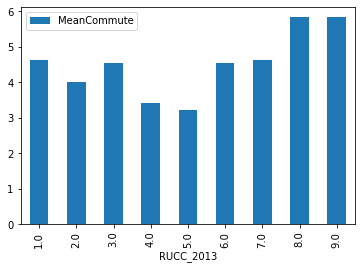

In [60]:
#display the above using pandas plotting function
drivetimes.plot(kind='bar');


In [61]:
#instacart dataset: pd.concat, pd.merge
#get compressed file in tarball format
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
#decompress tarball file
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01
# bash command: list the contents of that folder.
!ls *.csv

--2019-11-09 21:00:23--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.129.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.129.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  13.4MB/s    in 16s     

2019-11-09 21:00:40 (12.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/.

In [62]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.sample(3)

(32434489, 4)


order_id  product_id  add_to_cart_order  reordered
31557027   3328362       38890                  7          0
21270151   2243618       23375                  6          0
18167624   1916335       16797                  5          0

In [63]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head(3)

(1384617, 4)


order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0

In [64]:
orders = pd.read_csv('orders.csv')
orders.head(3)

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0

In [0]:
products = pd.read_csv('products.csv')

In [66]:
orders.sample(2)

order_id  user_id eval_set  order_number  order_dow  \
2373330   3217031   142856    prior             1          0   
2476510   1584373   149034    prior             9          5   

         order_hour_of_day  days_since_prior_order  
2373330                 10                     NaN  
2476510                 22                    21.0

In [0]:
cols=['user_id', 'order_id', 'order_number','order_dow','order_hour_of_day']
orders=orders[cols]

In [0]:
condition = (orders['user_id']==1)
condition


In [0]:
orders[condition]

In [0]:
condition = (orders['user_id']==1) & (orders['order_number']<=2)
condition

In [0]:
orders_subset = orders[condition]

In [0]:
#concatenate order
print(order_products__prior.shape)
print(order_products__train.shape)

In [0]:
#concatenate them together
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape

In [0]:
condition = (order_products['order_id']==2398795)
condition

In [0]:
columns = ['order_id','add_to_cart_order','product_id']

In [0]:
#use the .loc method to filter rows and columns in a single blow
order_products_subset = order_products.loc[condition, columns]
order_products_subset

In [0]:
#merge. both of these subsets are now quite small
print(order_products_subset.shape)
orders_subset.shape

In [0]:
#what is their common key?
print(order_products_subset.columns)
print(orders_subset.columns)

In [0]:
merged = pd.merge(orders_subset, order_products_subset, on='order_id',how='inner')
merged

In [0]:
final = pd.merge(merged, products[['product_id','product_name']],how='inner',on='product_id')
final

In [0]:
#Read back in the datasets in their original form (no filters).
print(products.shape)
print(order_products.shape)
print(orders.shape)

In [0]:
product_names=['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
condition = products['product_name'].isin(product_names)
products=products[condition]
products

In [0]:
#Associate hour of day with a specific product.
#now common key, but 'order_products' join table works.
froyo_cream = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
print(froyo_cream.shape)
froyo_cream.head()


In [0]:
print(product_names)
froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]
print(froyo.shape)
print(cream.shape)

In [0]:
#how many orders included cream, in total and at each hour of the day?
cream['order_hour_of_day'].value_counts().sort_index()


In [0]:
cream_percents = cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

In [0]:
cream_percents.plot();

In [0]:
cream_percents=cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
froyo_percents = froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()

In [0]:
cream_percents.plot()
froyo_percents.plot();

In [0]:
#for comparison of 2 discrete variables
mycrosstab=pd.crosstab(froyo_cream['order_hour_of_day'],froyo_cream['product_name'])

In [0]:
mycrosstab.plot()

In [0]:
#pivot table
mypivot = froyo_cream.pivot_table(index='order_hour_of_day',columns='product_name', values='order_id', aggfunc=len)
mypivot

In [0]:
mypivot.plot();


In [0]:
columns={'order_hour_of_day':'Hour of Day Ordered','product_name':'Product','value':'Percent of Orders by Product'}

In [0]:
tidy_table=mycrosstab.reset_index().melt(id_vars='order_hour_of_day').rename(columns=columns)
tidy_table

In [0]:
##### YOUR CODE HERE #####
#Complete the code cells we skipped near the beginning of the notebook
#Table 2 --> Tidy
#Tidy --> Table 2
myindex=['john Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame([[np.nan,2],[16,11],[3,1]],columns=mycolumns,index=myindex)
#index means rows

In [110]:
table1

treatmenta  treatmentb
john Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1

In [111]:
table2 = table1.T
table2

john Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [112]:
#get columns as list to convert to tidy format. 
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [113]:
table1=table1.reset_index()
table1

index  treatmenta  treatmentb
0    john Smith         NaN           2
1      Jane Doe        16.0          11
2  Mary Johnson         3.0           1

In [114]:
tidy=table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy

index    variable  value
0    john Smith  treatmenta    NaN
1      Jane Doe  treatmenta   16.0
2  Mary Johnson  treatmenta    3.0
3    john Smith  treatmentb    2.0
4      Jane Doe  treatmentb   11.0
5  Mary Johnson  treatmentb    1.0

In [116]:
tidy=tidy.rename(columns={'index':'name','variable':'trt','value':'result'})
tidy

name         trt  result
0    john Smith  treatmenta     NaN
1      Jane Doe  treatmenta    16.0
2  Mary Johnson  treatmenta     3.0
3    john Smith  treatmentb     2.0
4      Jane Doe  treatmentb    11.0
5  Mary Johnson  treatmentb     1.0

In [115]:
tidy['trt']=tidy['trt'].str.replace('banana','')
tidy

KeyError: ignored

In [148]:
wide=tidy.pivot_table(index='name',columns='trt',values='result')
wide

trt           treatmenta  treatmentb
name                                
Jane Doe            16.0        11.0
Mary Johnson         3.0         1.0
john Smith           NaN         2.0

In [0]:
#TABLE 2! THE ASSIGNMENT
#Table 2 --> Tidy
#Tidy --> Table 2


In [151]:
table2 = table1.T
table2

0         1             2
index       john Smith  Jane Doe  Mary Johnson
treatmenta         NaN        16             3
treatmentb           2        11             1

In [131]:
#so, above is table2, so we wanna make it tidy
list(table2.columns)
table2.columns.tolist()

['level_0', 'index', 0, 1, 2]

In [140]:

table2.index.tolist()

[0, 1, 2]

In [152]:
table2

0         1             2
index       john Smith  Jane Doe  Mary Johnson
treatmenta         NaN        16             3
treatmentb           2        11             1

In [154]:
tidy2=table2.melt()
tidy2
#do not specify value_vars and columns will be used, excluding id_vars.

variable         value
0         0    john Smith
1         0           NaN
2         0             2
3         1      Jane Doe
4         1            16
5         1            11
6         2  Mary Johnson
7         2             3
8         2             1

In [159]:
#Tidy --> Table 2
wide2=tidy2.pivot_table('',columns='variable',values='value')
wide2
#table2 isn't the same as table1. I think it can't be reversed to wide format

TypeError: ignored

In [45]:
#Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

flights = sns.load_dataset('flights')
print(flights.shape)
print(flights.dtypes)


(144, 3)
year             int64
month         category
passengers       int64
dtype: object


In [25]:
#I want a pivot file for the assignment. So, first make a column list
flights.columns.tolist()

['year', 'month', 'passengers']

In [26]:
flights.head()
#make year the index, so that month is only column and passengers is dataset in tidy and pivot
#flights.set_index('year')


year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [35]:
tidy=flights.melt(id_vars='year',value_vars=['month','passengers'])
tidy

year    variable     value
0    1949       month   January
1    1949       month  February
2    1949       month     March
3    1949       month     April
4    1949       month       May
..    ...         ...       ...
283  1960  passengers       606
284  1960  passengers       508
285  1960  passengers       461
286  1960  passengers       390
287  1960  passengers       432

[288 rows x 3 columns]

In [36]:
#rename the columns
tidy = tidy.rename(columns={'variable':'month','value':'passengers'})
tidy

#the dataframe is mixed. I think it could be related to years is object data?

year       month passengers
0    1949       month    January
1    1949       month   February
2    1949       month      March
3    1949       month      April
4    1949       month        May
..    ...         ...        ...
283  1960  passengers        606
284  1960  passengers        508
285  1960  passengers        461
286  1960  passengers        390
287  1960  passengers        432

[288 rows x 3 columns]

In [38]:
pivot = tidy.pivot_table(index='year', columns='month', values='passengers')
pivot

DataError: ignored

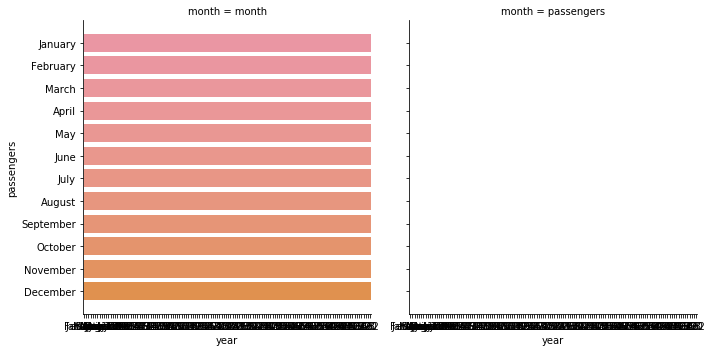

In [49]:
sns.catplot(data=tidy, x='year', y='passengers', col='month', kind='bar');

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####